In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import glob
import cv2
import natsort

In [47]:
images1 = natsort.natsorted(glob.glob('../../IMAGE/*-1.jpg'))
images2 = natsort.natsorted(glob.glob('../../IMAGE/*-2.jpg'))
depths = natsort.natsorted(glob.glob('../../SCAN/depth_*.csv'))
lumins = natsort.natsorted(glob.glob('../../SCAN/lumin_*.csv'))

In [ ]:
for i in range(len(depths)):

    image1 = cv2.imread(images1[i], cv2.IMREAD_COLOR)
    image2 = cv2.imread(images2[i], cv2.IMREAD_COLOR)
    lumin = pd.read_csv(lumins[i], header=None)
    depth = pd.read_csv(depths[i], header=None)

    fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,3))
    ax[0].imshow(image1); ax[1].imshow(image2); 
    lu = ax[2].imshow(lumin, cmap = 'gray')
    neg = ax[3].imshow(depth, cmap = cm.seismic)
    fig.colorbar(lu, ax=ax[2], location='right', anchor=(0.3, 0.5), shrink=0.3)
    fig.colorbar(neg, ax=ax[3], location='right', anchor=(0.3, 0.5), shrink=0.3)
    plt.show()

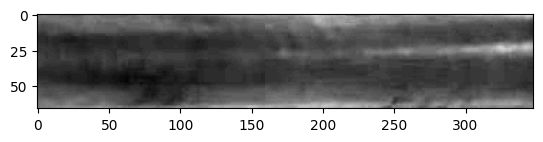

In [16]:
red_part = image1[:,:,0]
green_part = image1[:,:,1]
blue_part = image1[:,:,2]

# plt.imshow(red_part, cmap='gray')
plt.imshow(green_part, cmap='gray')
# plt.imshow(blue_part, cmap='gray')
plt.show()

컬러이미지의 RGB MEAN & STD 구하기

In [120]:
import numpy as np
from PIL import Image

def calculate_image_stats(img_array):
    # 각 색상 채널에 대한 평균과 표준 편차 계산 
    mean_values = np.mean(img_array, axis=(0, 1))
    std_values = np.std(img_array, axis=(0, 1))

    return mean_values, std_values

def luminance_to_rgb(img_array, luminance):
    mean, std = calculate_image_stats(img_array)
    # 주어진 평균과 표준 편차를 사용하여 휘도를 RGB로 변환
    rgb_values = [(l * std + mean) for l in luminance]
    return rgb_values

def restore_color(np_array, rgb_image):
    img = Image.fromarray(np_array)
    img = img.convert('L')
    
    luminance_values = np.array(img).flatten()
    # 휘도를 RGB로 변환
    rgb_values = luminance_to_rgb(rgb_image, luminance_values)
    print(rgb_values[0])
    # RGB 값을 이미지 크기에 맞게 reshape
    rgb_values = np.reshape(rgb_values, (img.size[1], img.size[0], 3))

    # numpy array를 이미지로 변환
    rgb_image = Image.fromarray(np.uint8(rgb_values))

    return rgb_image

[282.25868003 280.58646658 284.48267527]


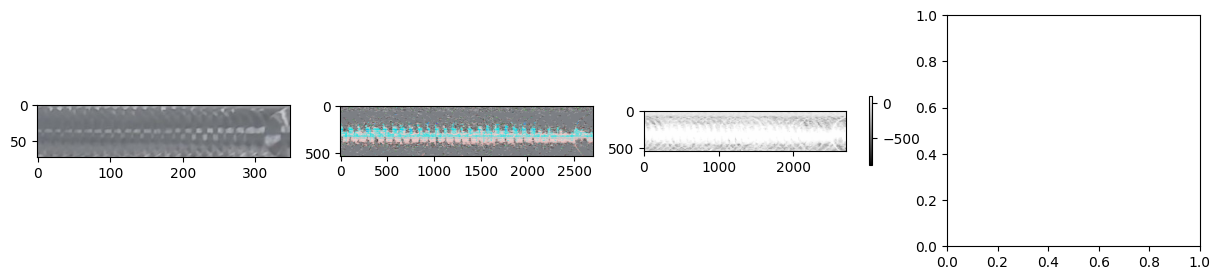

[440.19605376 428.92792785 423.48561906]


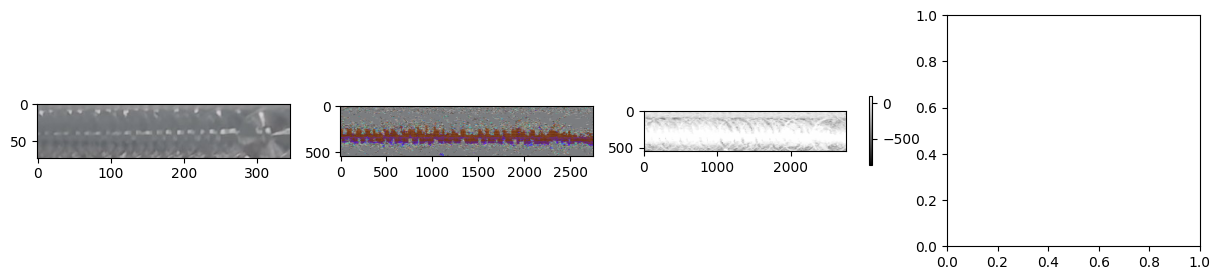

[1122.1942653  1093.69054445 1092.48374513]


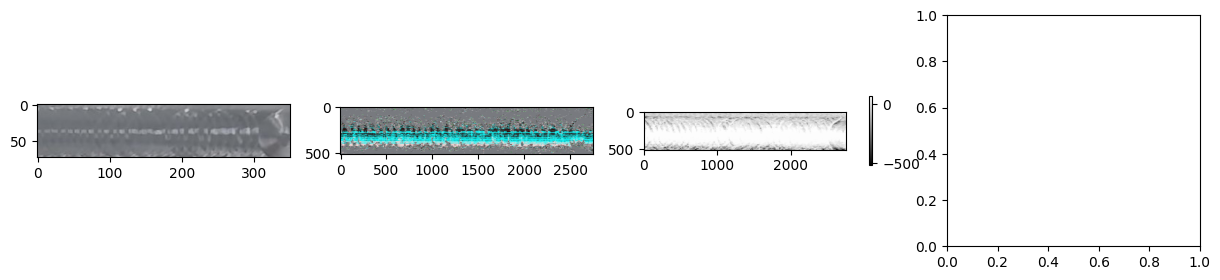

[121.13117258 123.90352961 128.50479382]


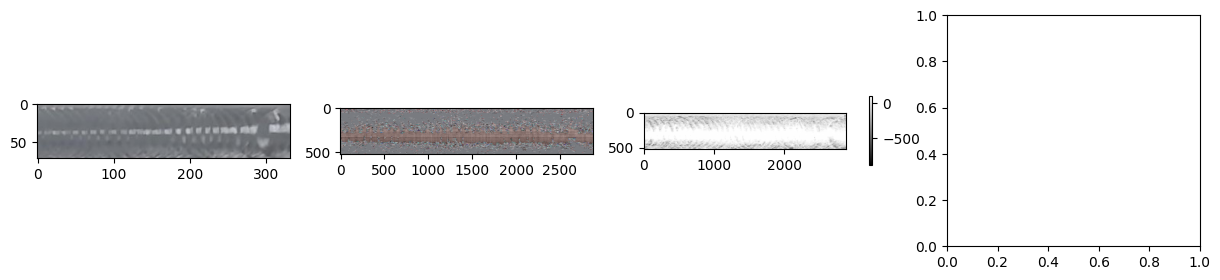

[119.19786118 121.90358809 127.15669516]


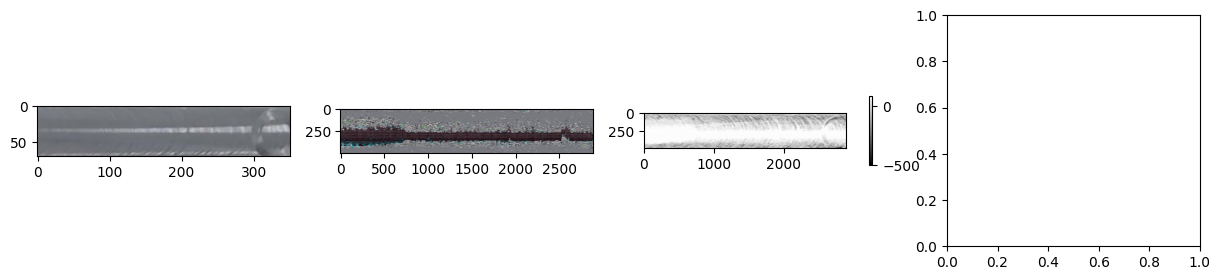

[114.6425203  118.66649201 124.97677059]


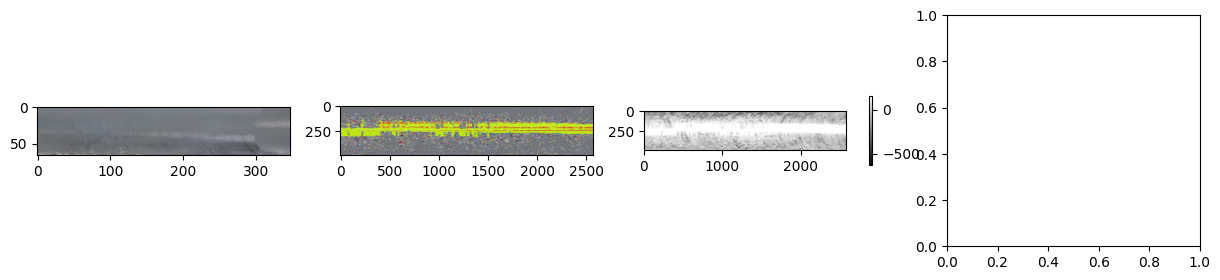

[111.48401328 115.36134989 121.94037386]


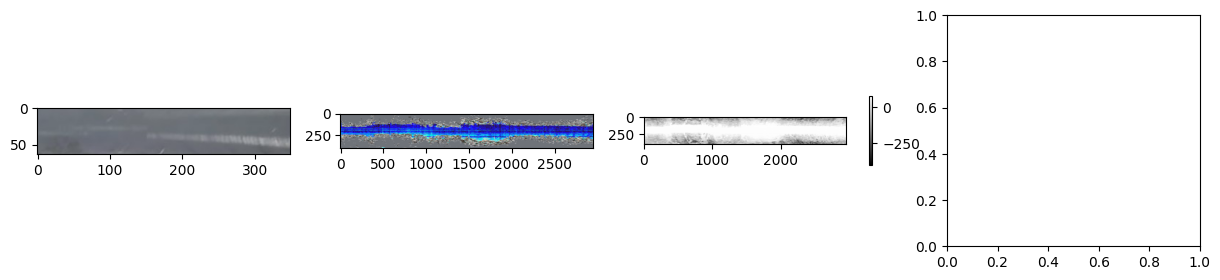

[114.74395595 118.29575573 125.69784205]


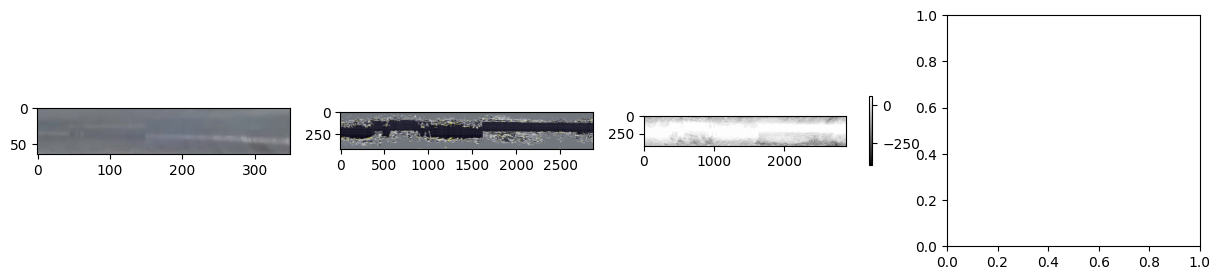

[111.75701137 115.24502909 121.71550751]


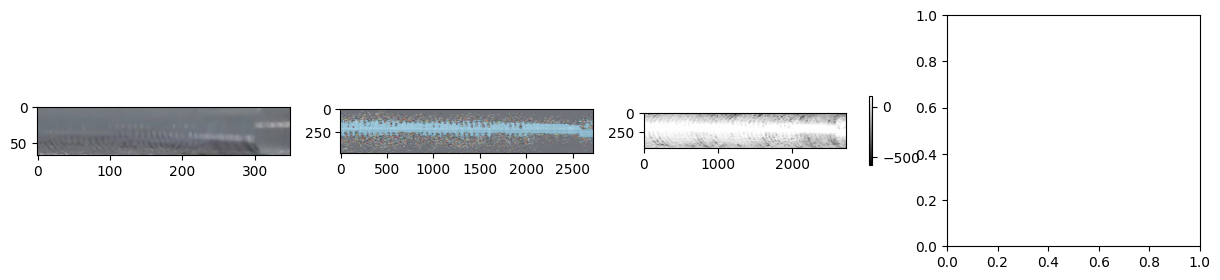

[120.99787435 123.14792946 128.44811841]


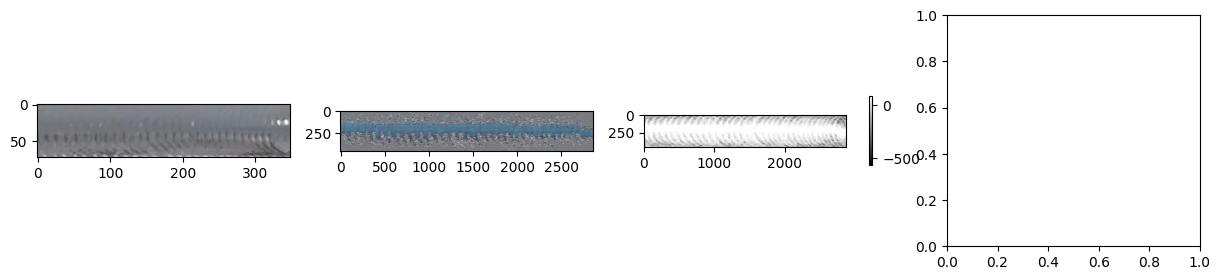

[112.19037356 115.22625085 120.56342968]


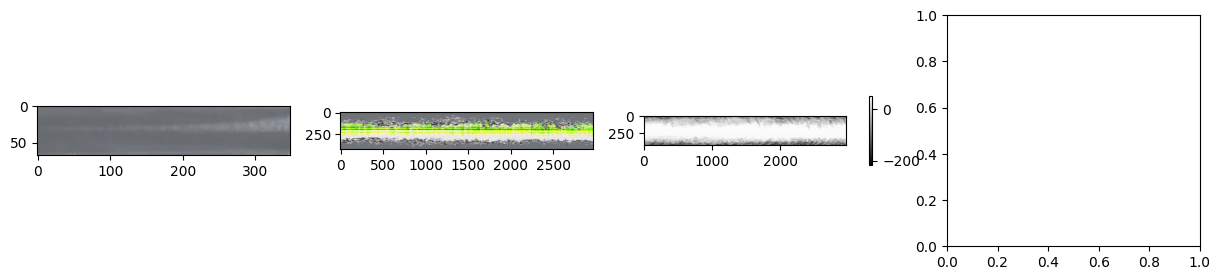

[116.2133403  121.5300418  129.33202717]


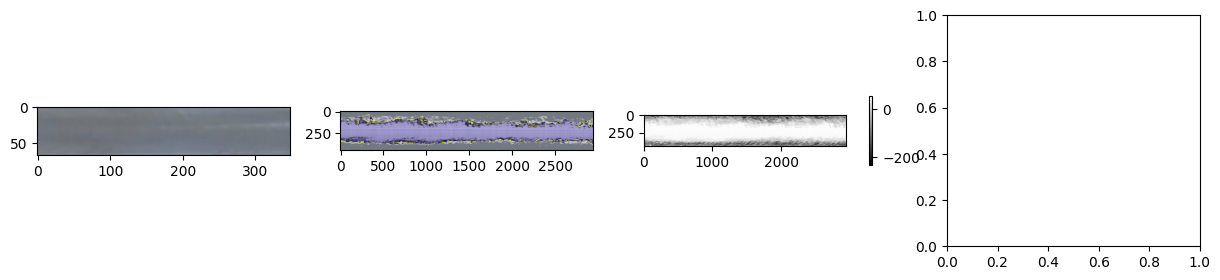

In [123]:
for i in range(len(depths)):

    image1 = cv2.imread(images1[i], cv2.IMREAD_COLOR)
    image2 = cv2.imread(images2[i], cv2.IMREAD_COLOR)
    lumin = pd.read_csv(lumins[i], header=None)
    depth = pd.read_csv(depths[i], header=None)
    fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,3))
    ax[0].imshow(image1); #ax[1].imshow(image2); 
    ax[1].imshow(restore_color(lumin.to_numpy(), image1 ))
    # neg = ax[3].imshow(depth, cmap = cm.seismic)
    lu = ax[2].imshow(lumin, cmap = 'grey')
    fig.colorbar(lu, ax=ax[2], location='right', anchor=(0.3, 0.5), shrink=0.3)
    # fig.colorbar(neg, ax=ax[3], location='right', anchor=(0.3, 0.5), shrink=0.3)
    plt.show()